In [1]:
import tempfile
from pathlib import Path

from pytorch_hyperlight.utils.image_utils import (
    load_image_as_resized_tensor,
    show_image_tensors,
)
from pytorch_hyperlight.utils.request_utils import copy_urls_to_files

In [3]:
def check(url_list, image_size=300):
    image_tensor = load_image_as_resized_tensor(url_list[0], image_size=image_size)
    image_size = list(image_tensor.shape)[1:]
    image_tensor_sec = load_image_as_resized_tensor(
        url_list[1], image_size=image_size, crop=True
    )

    show_image_tensors([image_tensor, image_tensor_sec])

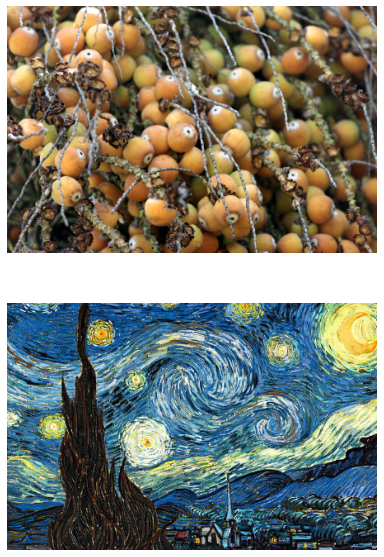

In [4]:
check(
    [
        "s3://open-images-dataset/validation/3605f98f8923e464.jpg",
        "http://c4.wallpaperflare.com/wallpaper/743/193/102/vincent-van-gogh-painting-the-starry-night-classic-art-wallpaper-preview.jpg",
    ]
)

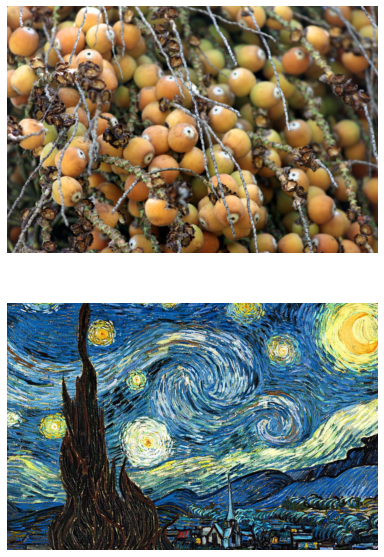

In [5]:
check(
    [
        "s3://open-images-dataset/validation/3605f98f8923e464.jpg",
        "http://c4.wallpaperflare.com/wallpaper/743/193/102/vincent-van-gogh-painting-the-starry-night-classic-art-wallpaper-preview.jpg",
    ],
    image_size = 1000
    
)

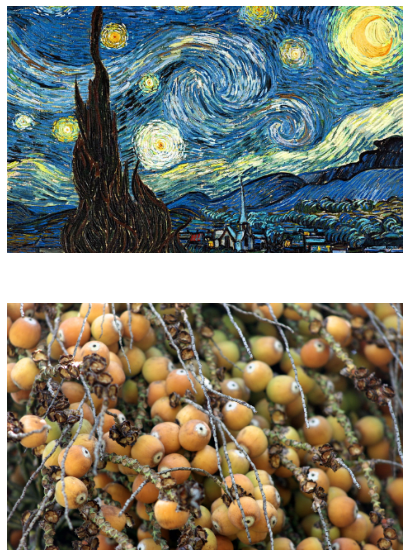

In [6]:
check(
    [
        "http://c4.wallpaperflare.com/wallpaper/743/193/102/vincent-van-gogh-painting-the-starry-night-classic-art-wallpaper-preview.jpg",
        "s3://open-images-dataset/validation/3605f98f8923e464.jpg",
    ]
)

In [7]:
def check_copy(url, file_name):
    with tempfile.TemporaryDirectory() as tmpdirname:
        tmp_file = Path(tmpdirname) / file_name
        copy_urls_to_files(
            url,
            tmp_file,
        )
        image_tensor = load_image_as_resized_tensor(tmp_file, image_size=300)
        show_image_tensors([image_tensor])

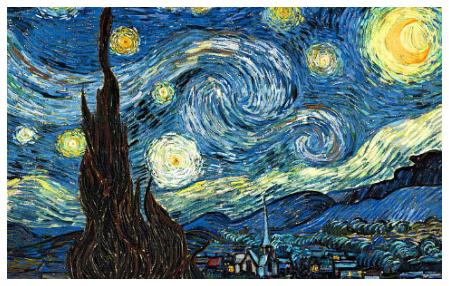

In [8]:
check_copy(
    "http://c4.wallpaperflare.com/wallpaper/743/193/102/vincent-van-gogh-painting-the-starry-night-classic-art-wallpaper-preview.jpg",
    "vincent-van-gogh-painting-the-starry-nigh.jpg",
)

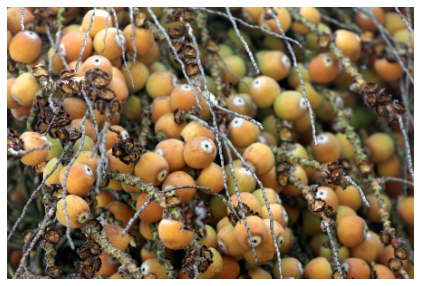

In [9]:
check_copy(
    "s3://open-images-dataset/validation/3605f98f8923e464.jpg", "3605f98f8923e464.jpg"
)